# Abstract

## This notebook includes: a sample of clean and dirty data, heart rate analysis with noise removal (optional), Bayevsky stress index, prediction of ECG signal behavior

# Heartbeat data analysis and plots

In [2]:
import heartpy as hp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import resample


sample_rate = 300

cleardata = hp.get_data('e0110.csv')
dirtydata = hp.get_data('118e24.csv')
annotations = hp.get_data('118e24_ann.csv')

## prepare for analysis

### let's look at our data at different points in time

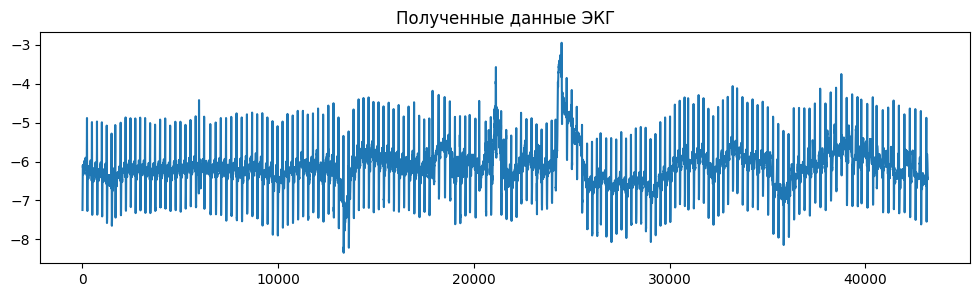

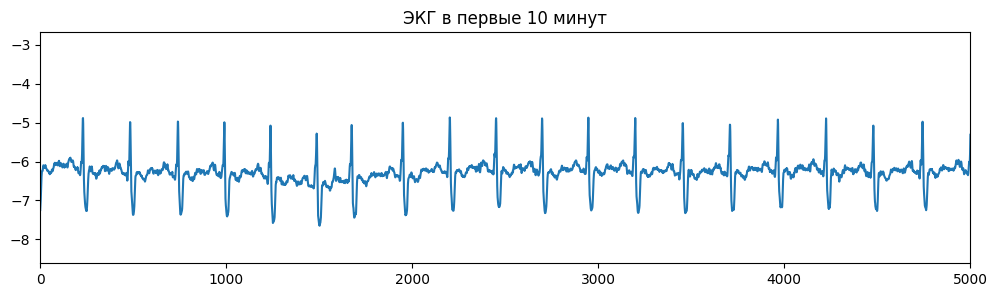

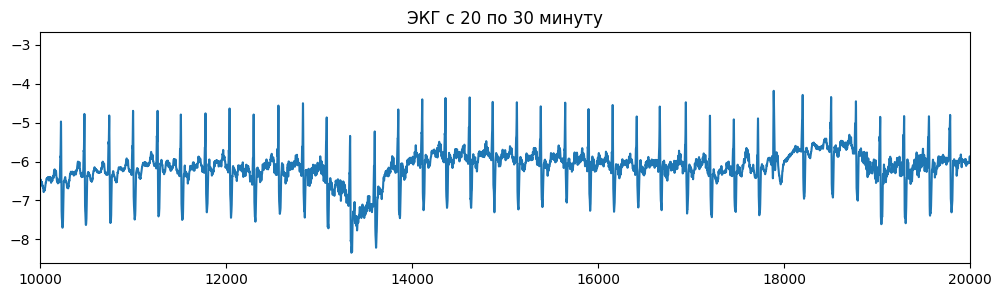

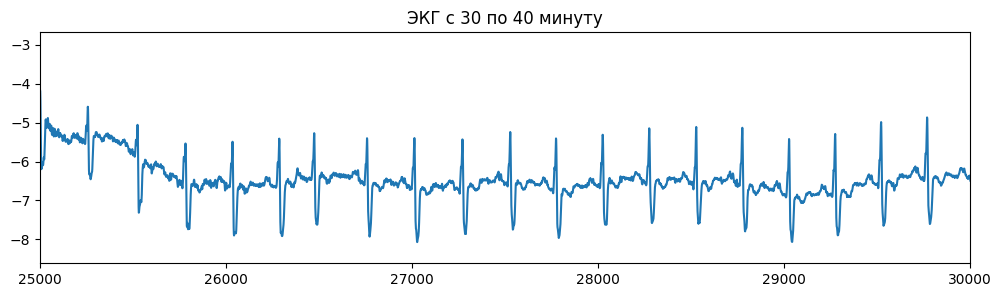

In [3]:
plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.title('Полученные данные ЭКГ')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.xlim(0, 5000)
plt.title('ЭКГ в первые 10 минут')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.xlim(10000, 20000)
plt.title('ЭКГ с 20 по 30 минуту')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.xlim(25000, 30000)
plt.title('ЭКГ с 30 по 40 минуту')
plt.show()

### Analysis

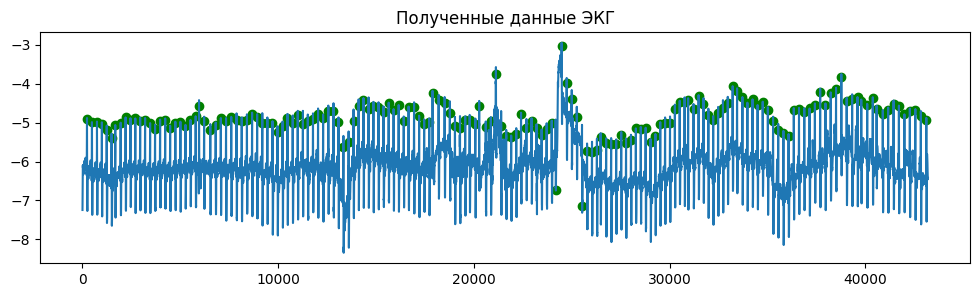

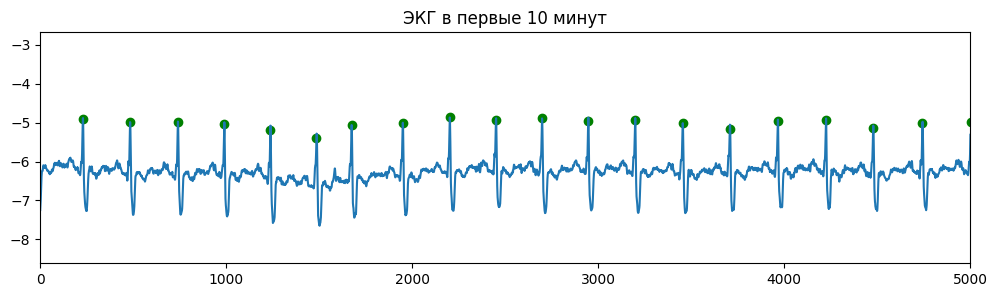

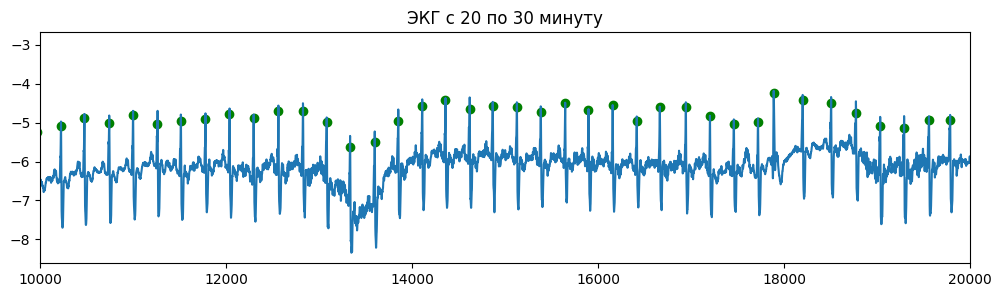

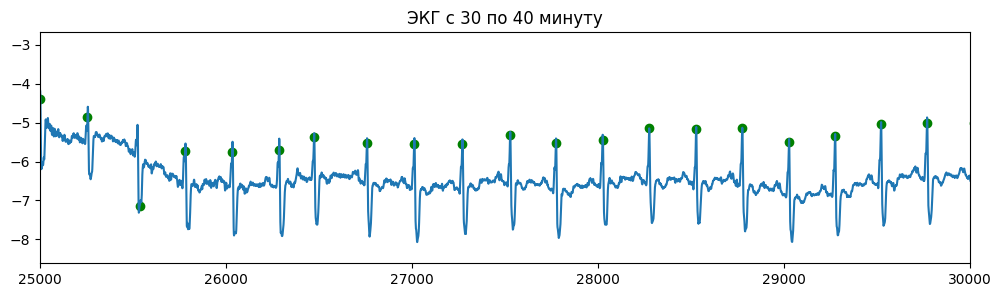

In [4]:
plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='green')
plt.title('Полученные данные ЭКГ')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='green')
plt.xlim(0, 5000)
plt.title('ЭКГ в первые 10 минут')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='green')
plt.xlim(10000, 20000)
plt.title('ЭКГ с 20 по 30 минуту')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(dirtydata)
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='green')
plt.xlim(25000, 30000)
plt.title('ЭКГ с 30 по 40 минуту')
plt.show()

### Filtration

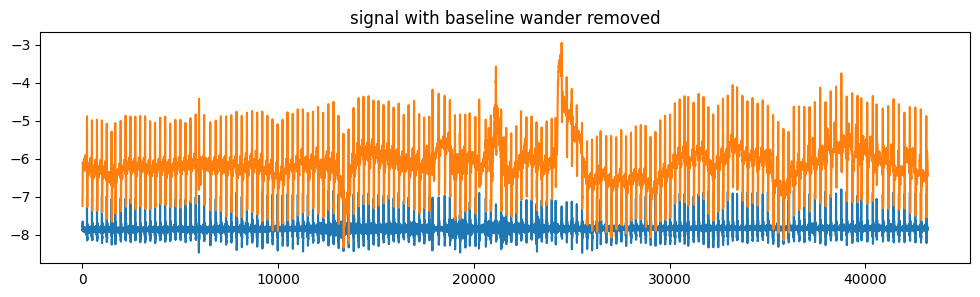

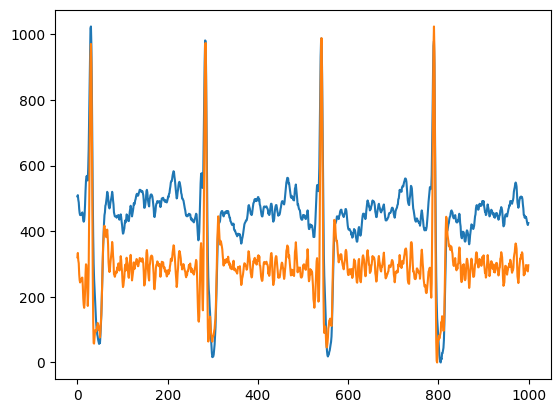

In [5]:
filtered = hp.remove_baseline_wander(dirtydata, sample_rate)

plt.figure(figsize=(12,3))
plt.title('signal with baseline wander removed')
plt.plot(filtered)
plt.plot(dirtydata)
plt.show()

plt.plot(hp.scale_data(dirtydata[200:1200]))
plt.plot(hp.scale_data(filtered[200:1200]))
plt.show()

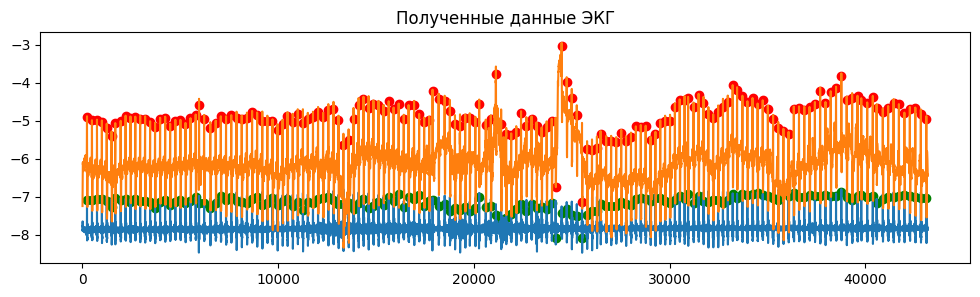

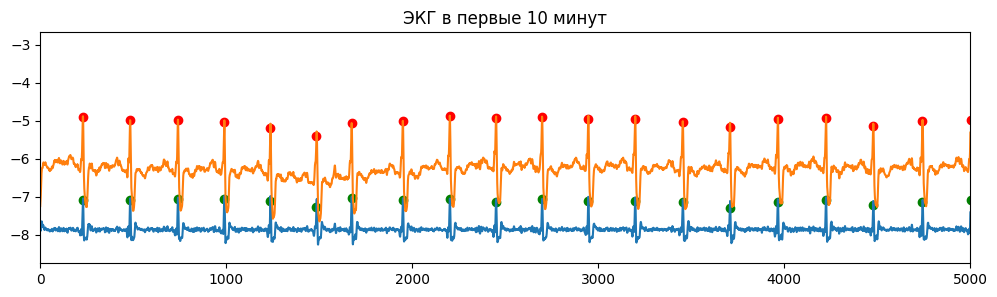

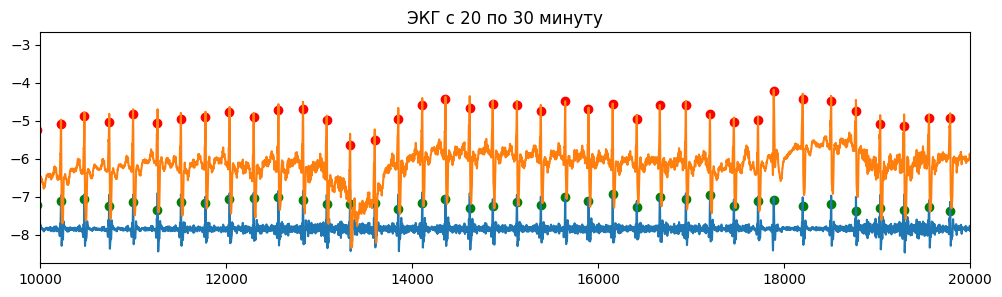

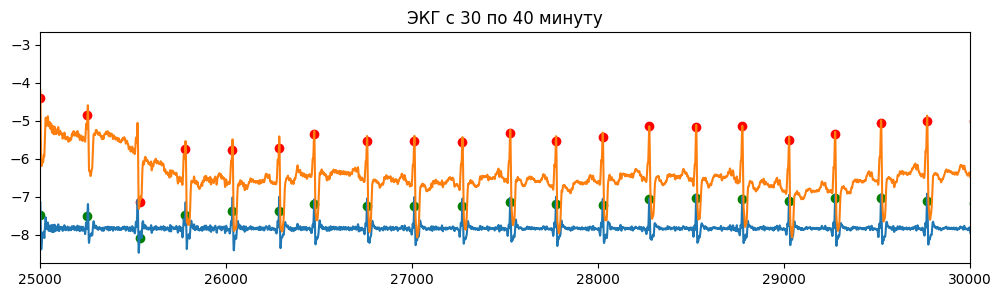

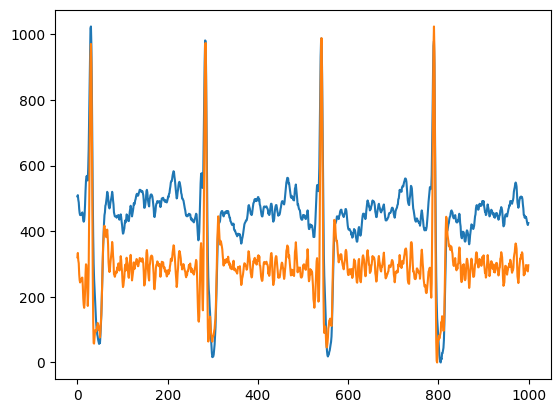

In [6]:
plt.figure(figsize=(12,3))
plt.plot(filtered)
plt.plot(dirtydata)
plt.scatter(annotations, [filtered[int(x)] for x in annotations], color='green')
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='red')
plt.title('Полученные данные ЭКГ')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(filtered)
plt.plot(dirtydata)
plt.scatter(annotations, [filtered[int(x)] for x in annotations], color='green')
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='red')
plt.xlim(0, 5000)
plt.title('ЭКГ в первые 10 минут')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(filtered)
plt.plot(dirtydata)
plt.scatter(annotations, [filtered[int(x)] for x in annotations], color='green')
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='red')
plt.xlim(10000, 20000)
plt.title('ЭКГ с 20 по 30 минуту')
plt.show()

plt.figure(figsize=(12,3))
plt.plot(filtered)
plt.plot(dirtydata)
plt.scatter(annotations, [filtered[int(x)] for x in annotations], color='green')
plt.scatter(annotations, [dirtydata[int(x)] for x in annotations], color='red')
plt.xlim(25000, 30000)
plt.title('ЭКГ с 30 по 40 минуту')
plt.show()



plt.plot(hp.scale_data(dirtydata[200:1200]))
plt.plot(hp.scale_data(filtered[200:1200]))

### R-R measure

[230, 483, 740, 990, 1238, 1486, 1674, 1950, 2202, 2451, 2698, 2947, 3199, 3455, 3708, 3966, 4225, 4479, 4744, 5003, 5262, 5518, 5783, 5954, 6215, 6530, 6806, 7068, 7335, 7601, 7871, 8136, 8402, 8666, 8924, 9187, 9446, 9709, 9966, 10223, 10475, 10742, 10998, 11254, 11262, 11512, 11777, 12036, 12295, 12561, 12825, 13080, 13332, 13334, 13597, 13850, 14108, 14358, 14360, 14618, 14865, 15125, 15382, 15644, 15896, 16155, 16414, 16662, 16942, 17201, 17458, 17718, 17887, 18198, 18504, 18771, 19032, 19280, 19289, 19291, 19556, 19784, 20075, 20269, 20604, 20864, 21124, 21126, 21392, 21651, 22164, 22408, 22683, 22946, 23199, 23459, 23717, 23975, 24175, 24481, 24482, 24742, 25000, 25257, 25524, 26034, 26285, 26473, 26757, 27012, 27270, 27527, 27773, 28024, 28274, 28527, 28775, 29026, 29274, 29521, 29768, 30020, 30268, 30515, 30764, 30945, 31223, 31481, 31731, 31979, 32226, 32478, 32725, 32970, 33221, 33446, 33719, 33974, 34237, 34496, 34756, 35019, 35286, 35548, 35814, 36078, 36345, 36611, 36881,

C:\Users\nikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\visualizeutils.py:299: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


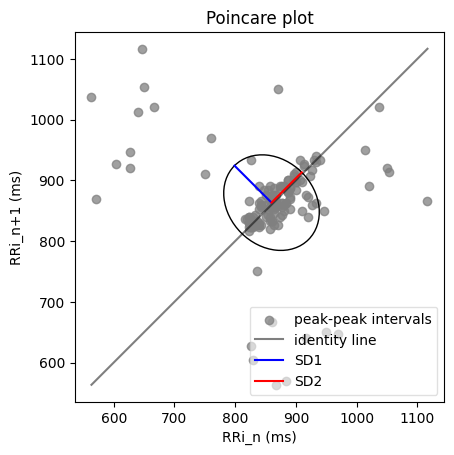

In [7]:
wd, m = hp.process(dirtydata, 300.0)
hp.plot_poincare(wd, m)
peaklist = wd['peaklist']
print(peaklist)

In [8]:
wd = hp.analysis.calc_rr(peaklist, sample_rate = 100.0)
rrlist = wd['RR_list']
print(rrlist)

[2530. 2570. 2500. 2480. 2480. 1880. 2760. 2520. 2490. 2470. 2490. 2520.
 2560. 2530. 2580. 2590. 2540. 2650. 2590. 2590. 2560. 2650. 1710. 2610.
 3150. 2760. 2620. 2670. 2660. 2700. 2650. 2660. 2640. 2580. 2630. 2590.
 2630. 2570. 2570. 2520. 2670. 2560. 2560.   80. 2500. 2650. 2590. 2590.
 2660. 2640. 2550. 2520.   20. 2630. 2530. 2580. 2500.   20. 2580. 2470.
 2600. 2570. 2620. 2520. 2590. 2590. 2480. 2800. 2590. 2570. 2600. 1690.
 3110. 3060. 2670. 2610. 2480.   90.   20. 2650. 2280. 2910. 1940. 3350.
 2600. 2600.   20. 2660. 2590. 5130. 2440. 2750. 2630. 2530. 2600. 2580.
 2580. 2000. 3060.   10. 2600. 2580. 2570. 2670. 5100. 2510. 1880. 2840.
 2550. 2580. 2570. 2460. 2510. 2500. 2530. 2480. 2510. 2480. 2470. 2470.
 2520. 2480. 2470. 2490. 1810. 2780. 2580. 2500. 2480. 2470. 2520. 2470.
 2450. 2510. 2250. 2730. 2550. 2630. 2590. 2600. 2630. 2670. 2620. 2660.
 2640. 2670. 2660. 2700. 2690. 2730. 2690. 2700. 2690. 2720. 2700. 2740.
 2780. 2750. 1920. 3040. 2850. 1950. 3160. 2740. 27

## baevsky stress index

In [9]:
# print(max(rrlist))
# print(min(rrlist))
# print(max(rrlist) - min(rrlist))

# # sress_score = AMo / (2 * VR * Mo)

In [ ]:
def bsi():
    
    

In [49]:
# def stress_score(hr):
#     # score = AMo / (2 * VR * Mo)
#     # R-R interval - time delay between consecutive heart beats (assumed to be inverse value of the bpm)
#     # Mo - mode - most frequent R-R interval value
#     # AMo - mode amplitude - % of the intervals corresponding to Mode
#     # VR - variational range - difference  between min and max R-R intervals

#     r_r = [round(60. / float(r), 3) for r in hr]

#     if len(r_r) == 0:
#         return 0  # give up to calculate the score to prevent division by zero

#     # naive calculations, might be improved
#     min_r_r = min(rrlist)
#     max_r_r = max(rrlist)
#     mode = 0
#     mode_freq = 0
#     for record in r_r:
#         if record < min_r_r:
#             min_r_r = record
#         if record > max_r_r:
#             max_r_r = record
#         freq = r_r.count(record)
#         if freq > mode_freq:
#             mode_freq = freq
#             mode = record

#     VR = max_r_r - min_r_r
#     Amode = mode_freq / float(len(r_r)) * 100

#     if abs(VR) < 0.0001:
#         return 0  # give up to calculate the score to prevent division by zero

#     return min(1000, round(Amode / (2 * VR * mode)))

# stress_score(300)
# # DEBUG ALL!!!!!!!!!!!!!!!!!!!!!!!!!

# Neurokit

In [3]:
nk.ecg_process('e0110.csv', sampling_rate=1000, method='neurokit')

ValueError: NeuroKit error: we expect the user to provide a vector, i.e., a one-dimensional array (such as a list of values). Current input of shape: ()

# Test samples

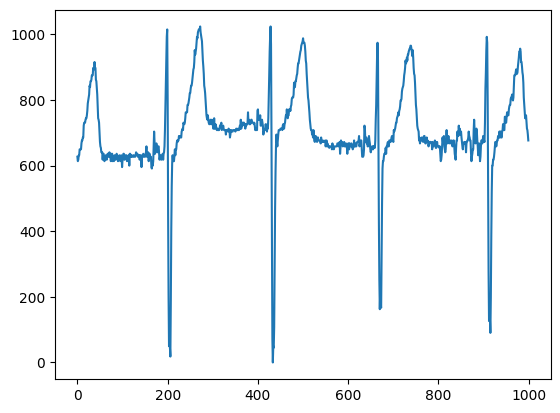

In [31]:
plt.plot(hp.scale_data(cleardata[200:1200]))
plt.show()

### Simple way

In [26]:
# # plt.figure(figsize=(12,4))
# # plt.plot(data)
# # plt.show()

# # #and zoom in a bit
# # plt.figure(figsize=(12,4))
# # plt.plot(data[0:2500])
# # plt.show()

# wd, m = hp.process(cleardata, sample_rate)

# #visualise in plot of custom size
# plt.figure(figsize=(12,4))
# hp.plotter(wd, m)

# #display computed measures
# for measure in m.keys():
#     print('%s: %f' %(measure, m[measure]))

### Function

In [27]:
# def load_visualise(data_file, annotations_file):
#     '''
#     loads data and annotations, plots them 
#     and returns data and annotations
#     '''
    
    
#     #load the data
#     ecg = hp.get_data(data_file)

#     #get the annotations
#     annotations = hp.get_data(annotations_file)
#     #explore signal
#     plt.figure(figsize=(12,3))
#     plt.plot(ecg)
#     plt.scatter(annotations, [ecg[int(x)] for x in annotations], color='green')
#     plt.show()

#     #and zoom in
#     plt.figure(figsize=(12,3))
#     plt.plot(ecg)
#     plt.scatter(annotations, [ecg[int(x)] for x in annotations], color='green')
#     plt.xlim(20000, 26000)
#     plt.show()
    
#     return ecg, annotations

# ecg, annotations = load_visualise('118e24.csv', '118e24_ann.csv')

## main analysis

### Clean signal

In [28]:
# filtered = hp.filter_signal(cleardata, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')

# #run analysis
# wd, m = hp.process(hp.scale_data(cleardata), sample_rate)

# #display computed measures
# for measure in m.keys():
#     print('%s: %f' %(measure, m[measure]))

# #resample the data. Usually 2, 4, or 6 times is enough depending on original sampling rate
# resampled_data = resample(cleardata, len(filtered) * 2)

# #And run the analysis again. Don't forget to up the sample rate as well!
# wd, m = hp.process(hp.scale_data(resampled_data), sample_rate * 2)

# #visualise in plot of custom size
# plt.figure(figsize=(12,4))
# hp.plotter(wd, m)

# #display computed measures
# for measure in m.keys():
#     print('%s: %f' %(measure, m[measure]))

# hp.plot_poincare(wd, m)

# #print poincare measures
# poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
# print('\nnonlinear poincare measures:')
# for measure in poincare_measures:
#     print('%s: %f' %(measure, m[measure]))

# Prediction of signal behavior

### Dirty signal

In [ ]:
plt.plot(hp.scale_data(data[200:1200]))